In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [26]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [112]:
def generate_accuracy_and_headmap(model,x,y):
    #cm = confusion_matrix(y,model.predict(x))
    #sns.heatmap(cm,annot = True, fmt='d')
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    #print('Confusion Matrix is:', cm)
    print('Accuracy is:', ac)
    print('F1 Score is', f_score)
    print('\n')
    print(pd.crosstab(pd.Series(model.predict(x), name = 'Predicated'),
                      pd.Series(y['Outcome'],name='Actual')))
    return 1

In [3]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\diabetes.csv")

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df['BloodPressureSquare'] = np.square(df['BloodPressure'])
df['BloodPressureCube'] = df['BloodPressure']**3
df['BloodPressureSqrt'] = np.sqrt(df['BloodPressure'])

In [13]:
df['GlucoseSquare'] = np.square(df['Glucose'])
df['GlucoseCube'] = df['Glucose']**3
df['GlucoseSqrt'] = np.sqrt(df['Glucose'])

In [15]:
df['GlucoseCubeBloodPressure'] =df['BloodPressure'] * df['Glucose']
df['AgeBMI'] = df['Age'] * df['BMI']

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressureCube,BloodPressureSqrt,GlucoseSquare,GlucoseCube,GlucoseSqrt,GlucoseCubeBloodPressure,AgeBMI
0,6,148,72,35,0,33.6,0.627,50,1,5184,373248,8.485281,21904,3241792,12.165525,10656,1680.0
1,1,85,66,29,0,26.6,0.351,31,0,4356,287496,8.124038,7225,614125,9.219544,5610,824.6
2,8,183,64,0,0,23.3,0.672,32,1,4096,262144,8.000000,33489,6128487,13.527749,11712,745.6
3,1,89,66,23,94,28.1,0.167,21,0,4356,287496,8.124038,7921,704969,9.433981,5874,590.1
4,0,137,40,35,168,43.1,2.288,33,1,1600,64000,6.324555,18769,2571353,11.704700,5480,1422.3


In [17]:
categorical_feature_columns = list(set(df.columns) -set(df._get_numeric_data().columns))
categorical_feature_columns

[]

In [22]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'BloodPressureSquare',
 'BloodPressureCube',
 'BloodPressureSqrt',
 'GlucoseSquare',
 'GlucoseCube',
 'GlucoseSqrt',
 'GlucoseCubeBloodPressure',
 'AgeBMI']

In [23]:
target = 'Outcome'

<Axes: >

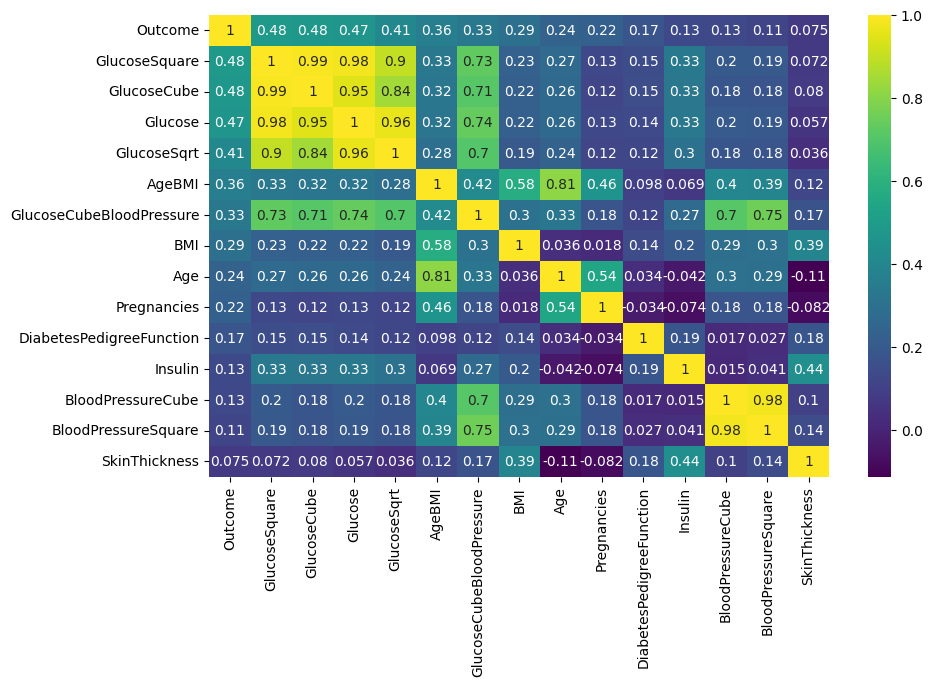

In [27]:
k =15 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k,target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [31]:
X = df.loc[:,df.columns != target]
Y = df.loc[:,df.columns == target]

In [32]:
X.shape

(768, 16)

In [33]:
Y.shape

(768, 1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [37]:
clf_lr = LogisticRegression()
lr_baseline_model = clf_lr.fit(x_train,y_train) 

Accuracy is: 0.7362204724409449
confusion_matrix is:- 
 [[141  27]
 [ 40  46]]
F1 Score is 0.5786163522012578


Actual       0   1
Predicated        
0           39  22
1           16  11


1

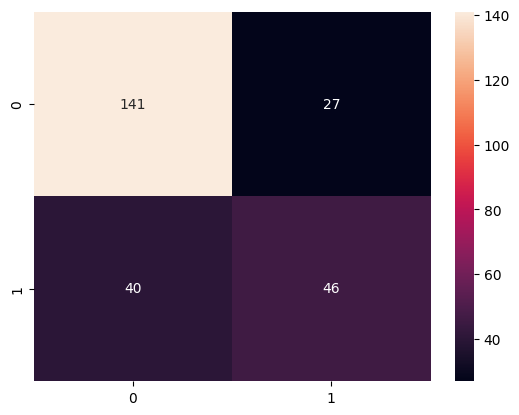

In [50]:
generate_accuracy_and_headmap(lr_baseline_model,x_test, y_test)

# Univariate feature selection

In [52]:
select_feature = SelectKBest(chi2, k=5).fit(x_train,y_train)

In [54]:
selected_feature_df = pd.DataFrame({'Feature':list(x_train.columns),
                                    'Scores': select_feature.scores_})
selected_feature_df.sort_values(by = 'Scores', ascending= False)

,Feature,Scores
12,GlucoseCube,176144509.143
9,BloodPressureCube,1593129.783
11,GlucoseSquare,564836.753
14,GlucoseCubeBloodPressure,110318.699
15,AgeBMI,16310.529
8,BloodPressureSquare,9645.350
4,Insulin,1710.652
1,Glucose,1033.139
7,Age,169.110
5,BMI,98.357


In [58]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)

In [60]:
x_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BloodPressureSquare,BloodPressureCube,BloodPressureSqrt,GlucoseSquare,GlucoseCube,GlucoseSqrt,GlucoseCubeBloodPressure,AgeBMI
464,10,115,98,0,0,24.000,1.022,34,9604,941192,9.899,13225,1520875,10.724,11270,816.000
223,7,142,60,33,190,28.800,0.687,61,3600,216000,7.746,20164,2863288,11.916,8520,1756.800
393,4,116,72,12,87,22.100,0.463,37,5184,373248,8.485,13456,1560896,10.770,8352,817.700


In [61]:
x_train_chi[0:3]

array([[9.412e+05, 1.322e+04, 1.521e+06, 1.127e+04, 8.160e+02],
       [2.160e+05, 2.016e+04, 2.863e+06, 8.520e+03, 1.757e+03],
       [3.732e+05, 1.346e+04, 1.561e+06, 8.352e+03, 8.177e+02]])

In [62]:
x_train_chi.shape

(514, 5)

In [82]:
lr_chi_model = LogisticRegression().fit(x_train_chi,y_train)

In [83]:
generate_accuracy_and_headmap(lr_chi_model, x_test_chi, y_test)

Accuracy is: 0.7322834645669292
F1 Score is 0.5405405405405406


Actual       0   1
Predicated        
0           41  25
1           14   8


1

In [84]:
print(x_train_chi.shape, x_test_chi.shape)

(514, 5) (254, 5)


In [77]:
print(x_test_chi.shape, y_test.shape)

(254, 5) (254, 1)


In [86]:
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(x_train,y_train)

In [89]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                    'Ranking': rfe.ranking_})
selected_rfe_features.sort_values(by = 'Ranking',)

,Feature,Ranking
0,Pregnancies,1
1,Glucose,1
2,BloodPressure,1
5,BMI,1
7,Age,1
15,AgeBMI,1
13,GlucoseSqrt,1
10,BloodPressureSqrt,1
4,Insulin,2
14,GlucoseCubeBloodPressure,3


In [90]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [91]:
x_train_rfe[0:3]

array([[  10.   ,  115.   ,   98.   ,   24.   ,   34.   ,    9.899,
          10.724,  816.   ],
       [   7.   ,  142.   ,   60.   ,   28.8  ,   61.   ,    7.746,
          11.916, 1756.8  ],
       [   4.   ,  116.   ,   72.   ,   22.1  ,   37.   ,    8.485,
          10.77 ,  817.7  ]])

In [93]:
lr_rfe_model = clf_lr.fit(x_train_rfe, y_train)

In [114]:
generate_accuracy_and_headmap(lr_rfe_model, x_test_rfe, y_test)

ValueError: X has 8 features, but LogisticRegression is expecting 7 features as input.

# Recursive feature elimination with cross validation

In [98]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age',
       'BloodPressureSqrt', 'GlucoseSqrt'],
      dtype='object')


In [100]:
rfecv.cv_results_['mean_test_score']

array([0.753, 0.751, 0.755, 0.767, 0.778, 0.772, 0.784, 0.774, 0.776,
       0.768, 0.77 , 0.778, 0.766, 0.757, 0.761, 0.761])

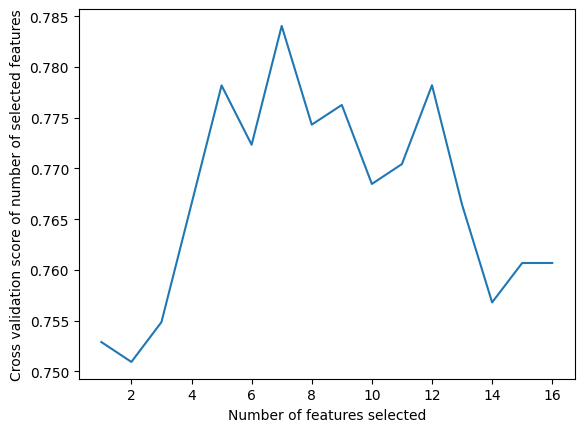

In [102]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [103]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [104]:
lr_rfecv_model = clf_lr.fit(x_train_rfecv, y_train)

Confusion Matrix is: [[138  30]
 [ 34  52]]
Accuracy is: 0.7480314960629921
F1 Score is 0.6190476190476191


Actual       0   1
Predicated        
0           36  22
1           19  11


1

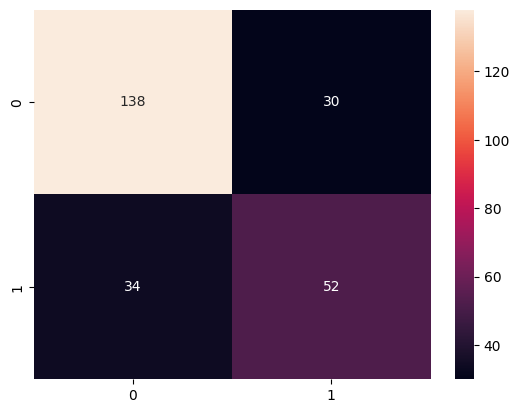

In [108]:
generate_accuracy_and_headmap(lr_rfecv_model, x_test_rfecv, y_test)